In [ ]:
#Data source = Kaggle.com
#Importing the necessary libraries and our three special libraries for data visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as pyoff

In [ ]:
#This is to import the data to google colab so as to access it.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the imported data

df = pd.read_csv('/content/drive/MyDrive/Csv/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<BarContainer object of 768 artists>

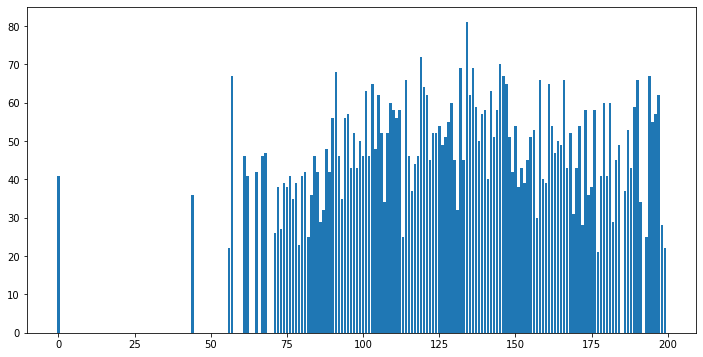

In [ ]:
#Now we are going to plot similar visuals using different data visualization library of the same parameters

#Using Matplotlib to plot a bar plot 
plt.figure(figsize=(12,6))
plt.bar(x = df['Glucose'],  height = df['Age'])

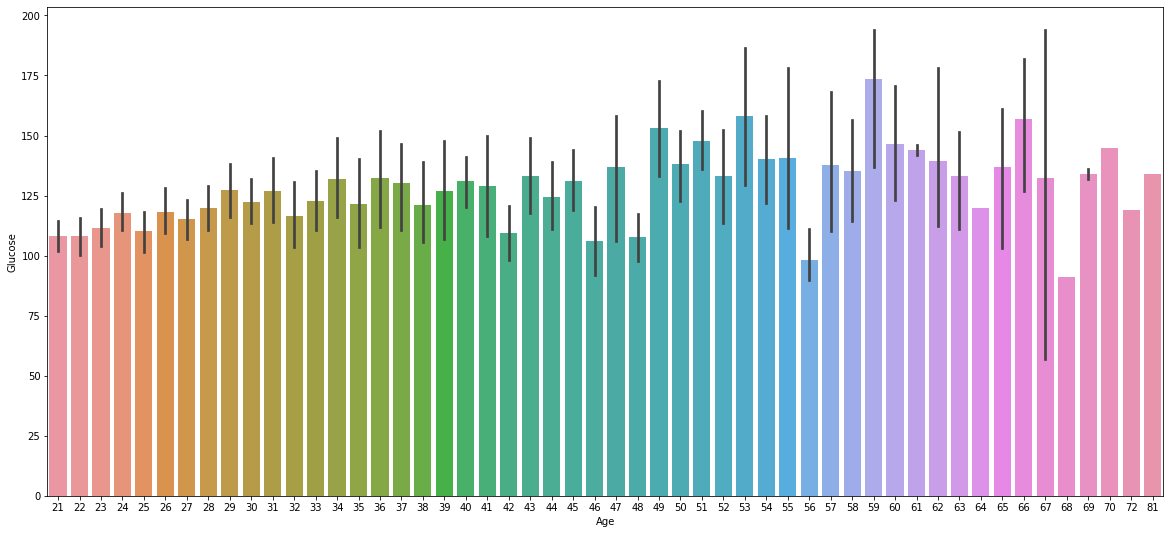

In [ ]:
#Using seaborn to plot a barplot 

plt.figure(figsize=(20,9))
sns.barplot(x = df['Age'], y = df['Glucose'], )
sns.color_palette("Blues", as_cmap=True)

In [ ]:
#Using plotly to plot barplot 
px.bar(x = df['Glucose'], y = df['Age'])

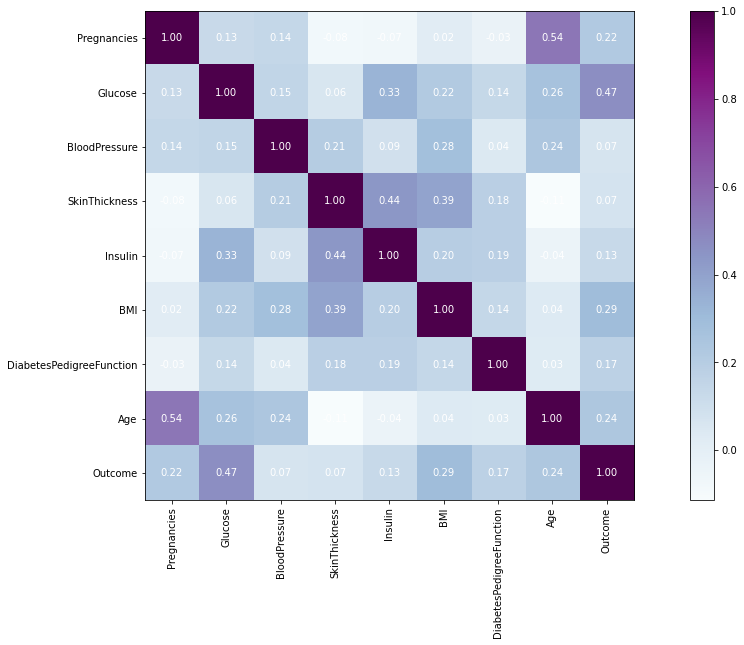

In [ ]:
#Another whihc we shall look at is how to plot the Heat map using different visualization tool
#Heatmap using matplotlib

plt.imshow(df.corr(), cmap="BuPu", interpolation="none")
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.gcf().set_size_inches(20,9)

labels = df.corr().values
for y in range(labels.shape[0]):
    for x in range(labels.shape[1]):
        plt.text(x, y, '{:.2f}'.format(labels[y, x]), ha='center', va='center', color='white')


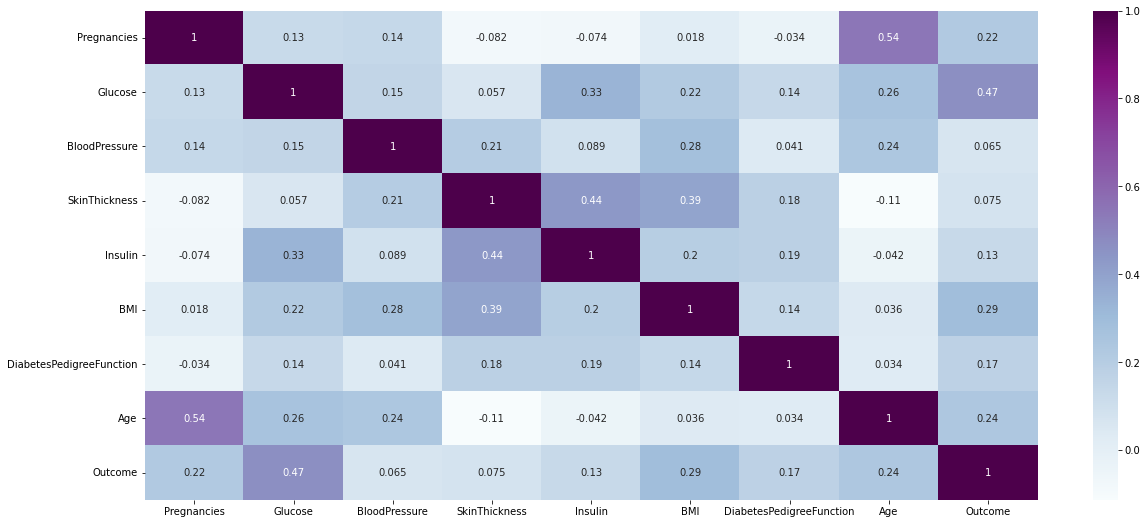

In [ ]:
#Heatmap using seaborn

plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")

In [ ]:
#Heatmap with plotly 
colorscale = [[0, '#edf8fb'], [.3, '#b3cde3'],  [.6, '#8856a7'],  [1, '#810f7c']]

heatmap = go.Heatmap(z=df.corr(), x=df.columns, y=df.columns, colorscale=colorscale)
data = [heatmap]
pyoff.iplot(data, filename='basic-heatmap')

In [ ]:
#Trying to visualize geospatial data would involve working with geospatial libraries.
#One of such libraries is the GEOPLOT.It is an extension to cartopy and matplotlib, which makes mapping easy.More options are provided for mapping and is designed to work with Geopandas input.

In [ ]:
#Using Geoplot to visualize UK Hospitals 
#Data source is = Kaggle.com 
!pip install geoplot

     |████████████████████████████████| 1.0 MB 12.5 MB/s 
     |████████████████████████████████| 10.8 MB 48.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 47.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 34.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 42.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 102.6 MB/s 
     |████████████████████████████████| 16.7 MB 329 kB/s 
     |████████████████████████████████| 6.3 MB 52.4 MB/s 
     |████████████████████████████████| 44 kB 2.5 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_6

In [ ]:
import geoplot as gplt
import geoplot.crs as gcrs
import imageio
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import pandas as pd
import matplotlib
import plotly.express as px
import geopandas as gdp
import folium
from folium import Marker
import geoplot
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read the data 

df = pd.read_csv('/content/drive/MyDrive/Csv/Hospital.csv')
df.head()

,OrganisationID,OrganisationCode,OrganisationType,SubType,Sector,OrganisationStatus,IsPimsManaged,OrganisationName,Address1,Address2,...,County,Postcode,Latitude,Longitude,ParentODSCode,ParentName,Phone,Email,Website,"Fax,,,"
0,17970,NDA07,Hospital,Hospital,Independent Sector,Visible,True,Walton Community Hospital - Virgin Care Servic...,NaN,Rodney Road,...,Surrey,KT12 3LD,51.379997,-0.406042,NDA,Virgin Care Services Ltd,01932 414205,NaN,NaN,"01932 253674,,,"
1,17981,NDA18,Hospital,Hospital,Independent Sector,Visible,True,Woking Community Hospital (Virgin Care),NaN,Heathside Road,...,Surrey,GU22 7HS,51.315132,-0.556289,NDA,Virgin Care Services Ltd,01483 715911,NaN,NaN,",,,"
2,18102,NLT02,Hospital,Hospital,NHS Sector,Visible,True,North Somerset Community Hospital,North Somerset Community Hospital,Old Street,...,Avon,BS21 6BS,51.437195,-2.847193,NLT,North Somerset Community Partnership Community...,01275 872212,NaN,http://www.nscphealth.co.uk,",,,"
3,18138,NMP01,Hospital,Hospital,Independent Sector,Visible,False,Bridgewater Hospital,120 Princess Road,NaN,...,Greater Manchester,M15 5AT,53.459743,-2.245469,NMP,Bridgewater Hospital (Manchester) Ltd,0161 2270000,NaN,www.bridgewaterhospital.com,",,,"
4,18142,NMV01,Hospital,Hospital,Independent Sector,Visible,True,Kneesworth House,Old North Road,Bassingbourn,...,NaN,SG8 5JP,52.078121,-0.030604,NMV,Partnerships In Care Ltd,01763 255 700,reception_kneesworthhouse@partnershipsincare.c...,www.partnershipsincare.co.uk,",,,"


In [ ]:
#This helps to revela every detail of all the columns in the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 1210
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrganisationID      1211 non-null   int64  
 1   OrganisationCode    1211 non-null   object 
 2   OrganisationType    1211 non-null   object 
 3   SubType             1211 non-null   object 
 4   Sector              1211 non-null   object 
 5   OrganisationStatus  1211 non-null   object 
 6   IsPimsManaged       1211 non-null   bool   
 7   OrganisationName    1211 non-null   object 
 8   Address1            883 non-null    object 
 9   Address2            727 non-null    object 
 10  Address3            147 non-null    object 
 11  City                1196 non-null   object 
 12  County              973 non-null    object 
 13  Postcode            1210 non-null   object 
 14  Latitude            1209 non-null   float64
 15  Longitude           1209 non-null   float64
 16  Parent

In [ ]:
#This is to check for missing values found in the dataframe 

df.isnull().sum()

OrganisationID           0
OrganisationCode         0
OrganisationType         0
SubType                  0
Sector                   0
OrganisationStatus       0
IsPimsManaged            0
OrganisationName         0
Address1               328
Address2               484
Address3              1064
City                    15
County                 238
Postcode                 1
Latitude                 2
Longitude                2
ParentODSCode            0
ParentName               0
Phone                  250
Email                  789
Website                358
Fax,,,                   2
dtype: int64

In [ ]:
#The missing values in the rows aboved are then dropped 

predrop=df.shape
droppeddf=df.dropna()
postdrop=droppeddf.shape
print(f"Out of an original {predrop[0]} rows, a total of {predrop[0]-postdrop[0]} will be dropped.")

Out of an original 1211 rows, a total of 1191 will be dropped.


In [ ]:
#The statistical analysis revelas every info concerning statistics

df.describe()

,OrganisationID,Latitude,Longitude
count,1.211000e+03,1209.000000,1209.000000
mean,1.375611e+06,52.317509,-1.293855
std,3.024986e+06,1.213026,1.294781
min,1.797000e+04,49.913063,-6.309277
25%,4.064900e+04,51.410404,-2.154729
50%,4.311000e+04,52.038059,-1.369305
75%,7.610700e+04,53.378357,-0.217204
max,1.095615e+07,55.773289,1.730521


In [ ]:
# A new dataframe containing the geo points with longitude and latitude is added to the origianl data

df_geo = gdp.GeoDataFrame(df, geometry = gdp.points_from_xy(df.Longitude, df.Latitude))

In [ ]:
df_geo

,OrganisationID,OrganisationCode,OrganisationType,SubType,Sector,OrganisationStatus,IsPimsManaged,OrganisationName,Address1,Address2,...,Postcode,Latitude,Longitude,ParentODSCode,ParentName,Phone,Email,Website,"Fax,,,",geometry
0,17970,NDA07,Hospital,Hospital,Independent Sector,Visible,True,Walton Community Hospital - Virgin Care Servic...,NaN,Rodney Road,...,KT12 3LD,51.379997,-0.406042,NDA,Virgin Care Services Ltd,01932 414205,NaN,NaN,"01932 253674,,,",POINT (-0.40604 51.38000)
1,17981,NDA18,Hospital,Hospital,Independent Sector,Visible,True,Woking Community Hospital (Virgin Care),NaN,Heathside Road,...,GU22 7HS,51.315132,-0.556289,NDA,Virgin Care Services Ltd,01483 715911,NaN,NaN,",,,",POINT (-0.55629 51.31513)
2,18102,NLT02,Hospital,Hospital,NHS Sector,Visible,True,North Somerset Community Hospital,North Somerset Community Hospital,Old Street,...,BS21 6BS,51.437195,-2.847193,NLT,North Somerset Community Partnership Community...,01275 872212,NaN,http://www.nscphealth.co.uk,",,,",POINT (-2.84719 51.43719)
3,18138,NMP01,Hospital,Hospital,Independent Sector,Visible,False,Bridgewater Hospital,120 Princess Road,NaN,...,M15 5AT,53.459743,-2.245469,NMP,Bridgewater Hospital (Manchester) Ltd,0161 2270000,NaN,www.bridgewaterhospital.com,",,,",POINT (-2.24547 53.45974)
4,18142,NMV01,Hospital,Hospital,Independent Sector,Visible,True,Kneesworth House,Old North Road,Bassingbourn,...,SG8 5JP,52.078121,-0.030604,NMV,Partnerships In Care Ltd,01763 255 700,reception_kneesworthhouse@partnershipsincare.c...,www.partnershipsincare.co.uk,",,,",POINT (-0.03060 52.07812)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,10956142,U7P1U,Hospital,UNKNOWN,Independent Sector,Visible,False,Farmfield Hospital,Farmfield Drive,Charlwood,...,RH6 0BN,51.166370,-0.201957,RXX,Surrey and Borders Partnership NHS Foundation ...,NaN,NaN,NaN,",,,",POINT (-0.20196 51.16637)
1207,10956143,B6Q2K,Hospital,UNKNOWN,Independent Sector,Visible,False,Shrewsbury Court Hospital,Whitepost Hill,NaN,...,RH1 6YY,51.237080,-0.179218,RXX,Surrey and Borders Partnership NHS Foundation ...,NaN,NaN,NaN,",,,",POINT (-0.17922 51.23708)
1208,10956150,K5E9C,Hospital,UNKNOWN,Independent Sector,Visible,False,Cygnet Hospital Woking,Oak Tree Clinic,Redding Way,...,GU21 2QS,51.314751,-0.615577,RXX,Surrey and Borders Partnership NHS Foundation ...,NaN,NaN,NaN,",,,",POINT (-0.61558 51.31475)
1209,10956151,L4S0G,Hospital,UNKNOWN,Independent Sector,Visible,False,Cygnet Hospital Harrow,London Road,NaN,...,HA1 3JL,51.567093,-0.337970,RXX,Surrey and Borders Partnership NHS Foundation ...,NaN,NaN,NaN,",,,",POINT (-0.33797 51.56709)


In [ ]:
#The new geo data is now compared with the world data

world_data = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))

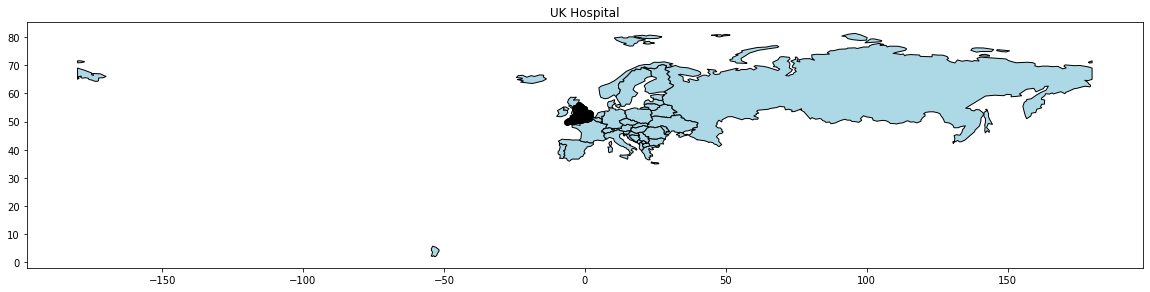

In [ ]:
#The axis of the plot are labelled and viewed containing the geographical points of the data

axis = world_data[world_data.continent == 'Europe'].plot(color = 'lightblue', edgecolor = 'black')

df_geo.plot(ax = axis, color = 'black')
plt.title('UK Hospital')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,9)
fig.savefig('matplot.png', dpi = 200)
plt.show()